## 다음 셀에 주어진 데이터를 이용해서 linear regression (선형 회귀) 문제를 
1. least square, 
2. batch gradient, 
3. stochastic gradient, 
4.mini-batch gradient 

## 방식으로 푸는 python 코드를 작성하시오.

(13,)


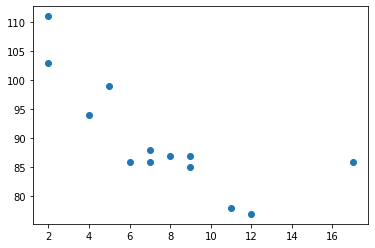

In [55]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

print(np.shape(x))
plt.scatter(x, y)
#plt.plot(x,y)
plt.show()


## 1. Least Square

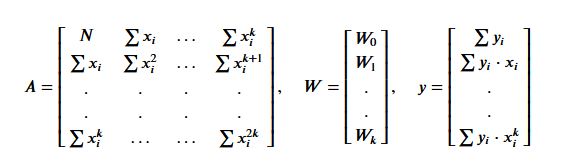

$AW=y$

$W=(A^T A)^{-1}A^Ty$

$A=(A^T A)$ 

$y=A^Ty$


In [33]:
degree=1
W = [np.random.random() for _ in range(degree + 1)] #[W_0, W_1]

def update_weights(degree, x, y):
    A = np.linalg.inv(np.array( 
        [ [sum(np.power(x, i)) for i in range(j, degree + 1 + j)] for j in range(degree + 1) ]
    ))

    return np.dot(A, np.array( [ sum(y * np.power(x, i)) for i in range(degree+1) ] ))

def predict(W, x):
    return sum([W[i] * x**i for i in range(len(W))])# W_0+W_1*x
    
W = update_weights(degree, x, y)
g = predict(W, x)

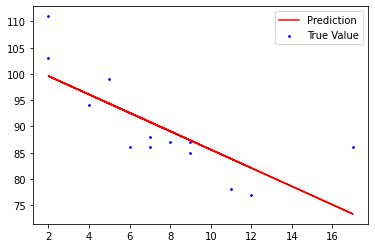

In [57]:
def plot_predictions(x_tr, y_tr, g):

    plt.scatter(x_tr, y_tr, s = 3, label = 'True Value',color='b')
    #plt.scatter(x_tr, g,s=5, label = 'Prediction',color='r')
    plt.plot(x_tr, g, label = 'Prediction',color='r')
    plt.legend()
    
    plt.show()
    
g = sum([W[i] * x**i for i in range(len(W))])

plot_predictions(x, y, g)

## 2. Batch gradient descent

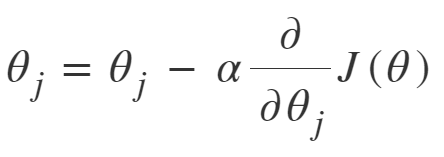

$J(W)= \frac{1}{2m} \sum^{m}_{i=1}(\hat{y}^i-y^i)^2$ (Mean Squared Error)

${\partial J(W) \over \partial W_j} = \frac{1}{m} \sum^{m}_{i=1}(\hat{y}^i-y^i)x^i_j$

$\hat{y}=w_1 *x_1 + w_2 *x_2 + w_3 * x_3 +b$

In [35]:
errors = []

num_epoch=5000
learning_rate=0.01

w1 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    
    y_hat = w1 * x + b

    error = ((y_hat - y)**2).mean()
    if error < 0.00001:
        break
        
    w1 = w1 - learning_rate * ((y_hat - y) * x).mean()
    
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f},b = {2:.5f}, error = {3:.5f}".format(epoch, w1, b, error))

print("----" * 15)
print("{0:2} w1 = {1:.1f}, b = {2:.1f}, error = {3:.5f}".format(epoch, w1,b, error))

 0 w1 = 6.80837,b = 0.81779, error = 6934.80876
 5 w1 = 8.65946,b = 2.11211, error = 2260.46816
10 w1 = 8.55006,b = 3.19250, error = 2213.14236
15 w1 = 8.43989,b = 4.26114, error = 2166.82806
20 w1 = 8.33088,b = 5.31834, error = 2121.49918
25 w1 = 8.22305,b = 6.36424, error = 2077.13475
30 w1 = 8.11637,b = 7.39895, error = 2033.71425
35 w1 = 8.01083,b = 8.42259, error = 1991.21761
40 w1 = 7.90642,b = 9.43528, error = 1949.62515
45 w1 = 7.80312,b = 10.43715, error = 1908.91765
50 w1 = 7.70093,b = 11.42829, error = 1869.07628
55 w1 = 7.59983,b = 12.40884, error = 1830.08260
60 w1 = 7.49982,b = 13.37890, error = 1791.91858
65 w1 = 7.40087,b = 14.33858, error = 1754.56657
70 w1 = 7.30299,b = 15.28800, error = 1718.00928
75 w1 = 7.20614,b = 16.22727, error = 1682.22983
80 w1 = 7.11034,b = 17.15649, error = 1647.21164
85 w1 = 7.01556,b = 18.07577, error = 1612.93852
90 w1 = 6.92179,b = 18.98522, error = 1579.39463
95 w1 = 6.82903,b = 19.88494, error = 1546.56445
100 w1 = 6.73726,b = 20.77504

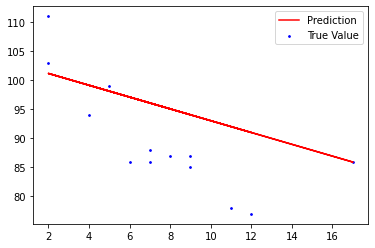

In [51]:
g=w1 * x + b
plot_predictions(x, y, g)

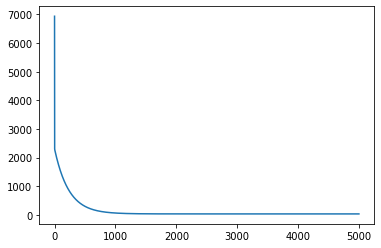

In [37]:
plt.plot(errors)

## 3. Stochastic gradient descent

$J(W)= (\hat{y}^i-y^i)^2$ (Mean Squared Error)

${\partial J(W) \over \partial W_j} = (\hat{y}-y)x_j$

In [38]:
errors = []
w1_grad = []

num_epoch=5000
learning_rate=0.01

w1 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    rnd=np.random.randint(13) #0~12까지의 정수 랜덤
    y_hat = w1 * x[rnd] + b

    error = ((y_hat - y[rnd])**2)
    #if error < 0.00001: #early stopping 
        #break
        
    w1 = w1 - learning_rate * ((y_hat - y[rnd]) * x[rnd])
    
    b = b - learning_rate * (y_hat - y[rnd])
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f},b = {2:.5f}, error = {3:.5f}".format(epoch, w1, b, error))

print("----" * 15)
print("{0:2} w1 = {1:.1f}, b = {2:.1f}, error = {3:.5f}".format(epoch, w1,b, error))

 0 w1 = 1.19444,b = 1.23506, error = 10942.49349
 5 w1 = 8.82147,b = 3.04192, error = 4499.04744
10 w1 = 11.26268,b = 3.86829, error = 43.37364
15 w1 = 9.71731,b = 4.26823, error = 203.53708
20 w1 = 3.39370,b = 4.48023, error = 157.26248
25 w1 = 8.35482,b = 6.07259, error = 1014.78955
30 w1 = 8.88564,b = 6.96470, error = 1133.78173
35 w1 = -0.01110,b = 8.35437, error = 25423.24566
40 w1 = 7.60202,b = 10.05385, error = 2244.64059
45 w1 = 11.25369,b = 11.57060, error = 120.20713
50 w1 = 10.90113,b = 12.64913, error = 2068.20466
55 w1 = 9.95436,b = 12.66273, error = 53.48779
60 w1 = 10.01722,b = 13.80158, error = 368.58626
65 w1 = 5.15449,b = 14.39025, error = 986.64779
70 w1 = 11.78951,b = 15.96096, error = 4462.24239
75 w1 = 8.80435,b = 15.60243, error = 7.56606
80 w1 = 10.25263,b = 16.02484, error = 996.00824
85 w1 = 3.37319,b = 15.43636, error = 2195.52402
90 w1 = 11.15146,b = 17.45044, error = 6.78303
95 w1 = 7.20408,b = 17.55080, error = 656.64580
100 w1 = 8.48013,b = 19.23461, erro

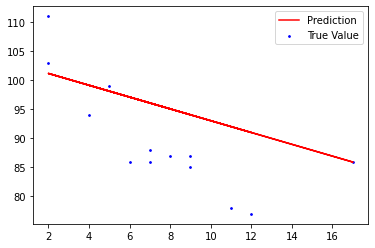

In [52]:
g=w1 * x + b
plot_predictions(x, y, g)

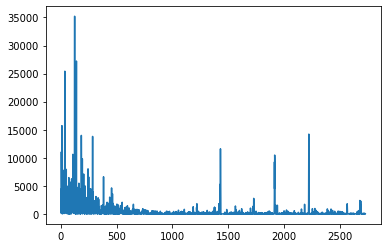

In [40]:
plt.plot(errors)

## 4. Mini-batch gradient descent

$J(W)= \frac{1}{2m} \sum^{m}_{i=1}(\hat{y}^i-y^i)^2$ (Mean Squared Error)

${\partial J(W) \over \partial W_j} = \frac{1}{m} \sum^{m}_{i=1}(\hat{y}^i-y^i)x^i_j$

In [41]:
errors = []
w1_grad = []

num_epoch=5000
learning_rate=0.01
mini_batch=3
w1 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    rnd=np.random.randint(13,size=mini_batch) #0~12 정수 랜덤 mini_batch 갯수 만큼 반환
    y_hat = w1 * x[rnd] + b

    error = ((y_hat - y[rnd])**2).mean()
    #if error < 0.00001:
    #    break
        
    w1 = w1 - learning_rate * ((y_hat - y[rnd]) * x[rnd]).mean()
    
    b = b - learning_rate * (y_hat - y[rnd]).mean()
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f},b = {2:.5f}, error = {3:.5f}".format(epoch, w1, b, error))

print("----" * 15)
print("{0:2} w1 = {1:.1f}, b = {2:.1f}, error = {3:.5f}".format(epoch, w1,b, error))

 0 w1 = 7.38203,b = 1.07480, error = 6998.06200
 5 w1 = 8.11767,b = 2.32435, error = 4172.58329
10 w1 = 8.33440,b = 3.91861, error = 3078.57701
15 w1 = 10.76417,b = 5.11738, error = 4335.82781
20 w1 = 12.42008,b = 6.67782, error = 2167.27295
25 w1 = 4.55535,b = 6.77540, error = 4069.19211
30 w1 = 10.17717,b = 8.33239, error = 4762.45944
35 w1 = 7.79355,b = 9.13429, error = 2631.56406
40 w1 = 7.71029,b = 10.11876, error = 3295.76988
45 w1 = 5.39306,b = 10.68832, error = 1588.56817
50 w1 = 5.89760,b = 12.22372, error = 3407.66295
55 w1 = 6.01549,b = 13.74040, error = 3596.94989
60 w1 = 8.48586,b = 14.69969, error = 170.31599
65 w1 = 6.99857,b = 15.36115, error = 1047.37024
70 w1 = 8.31429,b = 16.69122, error = 3207.28591
75 w1 = 8.82543,b = 17.74666, error = 2583.02534
80 w1 = 6.99864,b = 18.28228, error = 4506.20315
85 w1 = 6.93260,b = 19.32532, error = 1010.85085
90 w1 = 7.31349,b = 20.54115, error = 1086.25453
95 w1 = 6.24129,b = 20.93886, error = 1124.13772
100 w1 = 5.90197,b = 21.83

2975 w1 = -1.25879,b = 102.87512, error = 52.35146
2980 w1 = -1.15267,b = 102.88782, error = 106.21104
2985 w1 = -1.85535,b = 102.83959, error = 11.38953
2990 w1 = -2.08688,b = 102.80193, error = 4.51712
2995 w1 = -2.06746,b = 102.76351, error = 78.57262
3000 w1 = -2.01691,b = 102.83195, error = 14.94620
3005 w1 = -0.91267,b = 102.99083, error = 122.33865
3010 w1 = -1.99367,b = 102.79601, error = 19.35726
3015 w1 = -2.12139,b = 102.78699, error = 7.22823
3020 w1 = -1.83320,b = 102.73585, error = 11.36861
3025 w1 = -2.03189,b = 102.74805, error = 10.96604
3030 w1 = -1.97634,b = 102.83591, error = 56.98092
3035 w1 = -2.08996,b = 102.88492, error = 1.04207
3040 w1 = -1.05956,b = 102.99154, error = 103.75441
3045 w1 = -1.74945,b = 102.92713, error = 23.19567
3050 w1 = -1.11493,b = 102.95265, error = 97.21539
3055 w1 = -1.99754,b = 102.98892, error = 5.76646
3060 w1 = -2.29058,b = 102.98345, error = 14.36397
3065 w1 = -1.28613,b = 103.08550, error = 49.48188
3070 w1 = -2.02609,b = 103.07112

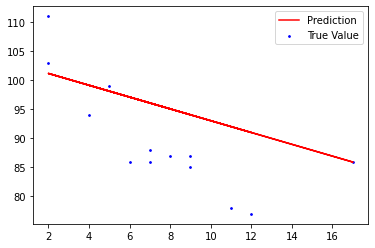

In [53]:
g=w1 * x + b
plot_predictions(x, y, g)

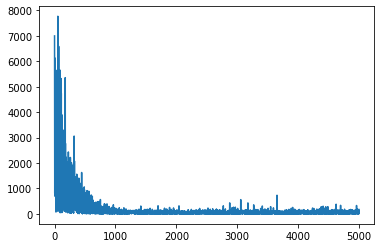

In [43]:
plt.plot(errors)